   # Problem: 
### You have been hired to deliver actionable insight to support your client who is a national charitable organization. The client seeks to use the results of a previous postcard mail solicitation for donations to improve outcome in the next campaign. You want to determine which of the individuals in their mailing database have characteristics similar to those of your most profitable donors. By soliciting only these people, your client can spend less money on the solicitation effort and more money on charitable concerns.

In [1]:
# This is a classification problem
# now let us import the necessary libries to profer solution to the problem
import numpy as np # for math computation / array/data prep for ML modelling
import pandas as pd # for data analysis / importing
import matplotlib.pyplot as plt # for plotting

# another plotting package - slightly better visuals than matplot
import seaborn as sns

In [2]:
# Machine Learning Modules from sklearn (sklearn is the go-to library for machine learning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, make_pipeline

In [3]:
RANDOM_STATE = 200 # seed to recreate results

In [4]:
#Functions for Supervised Classification Performance Metrics

def plot_roc_curve(y_true, y_score):
    from sklearn.metrics import roc_curve, auc
    
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(9, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (auc = {:0.2}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

def plot_confusion_matrix(cm, class_names):
    import itertools
   
    cm = cm.astype(np.float) # / cm.sum(axis=1)[:, np.newaxis]
 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    plt.show()

# Data import

In [5]:
#Now let import our data
# ie Read Donor file Raw Data_ML with Python.csv using pandas function
donor_data = pd.read_csv('Donor Raw Data_ML with Python.csv')

### Preliminary Exploratory Data Analysis

In [6]:
# now let have a look at our data,then display the first 5 rows
donor_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [7]:
# let get the dimensions of our data
donor_data.shape

(19372, 50)

In [8]:
# we have 19,372 rows and 50 columns in our data

In [9]:
# alternately we can get more information on our data
donor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

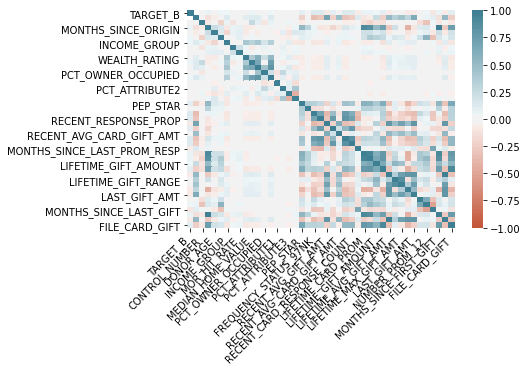

In [10]:
# let check for correlation among our variables(features)
# feature correlation
corr = donor_data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
# now let see correlation coeficient against individual features
corr

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
TARGET_B,1.000000,NaN,0.024607,0.062795,0.036949,0.040964,0.039932,-0.003219,0.012689,0.034742,...,-0.006354,-0.036990,-0.062756,-0.068220,0.038947,0.039967,-0.089854,0.066514,-0.067107,0.105552
TARGET_D,NaN,1.000000,0.021113,-0.126858,-0.056139,0.038842,0.126074,-0.002797,0.012679,0.114298,...,0.338629,0.443145,0.295783,0.645388,0.006996,0.064494,0.090215,-0.127522,0.516724,-0.229592
CONTROL_NUMBER,0.024607,0.021113,1.000000,-0.077874,-0.007441,-0.213938,0.062979,-0.110440,-0.014747,-0.019119,...,-0.030587,-0.011010,0.035819,0.000237,-0.143549,-0.316467,0.046103,-0.086687,0.011250,-0.083132
MONTHS_SINCE_ORIGIN,0.062795,-0.126858,-0.077874,1.000000,0.236176,0.155967,-0.082441,0.065620,0.078950,-0.075190,...,0.205255,-0.016958,-0.424114,-0.099209,0.130670,0.149149,-0.027650,0.987825,-0.260474,0.743423
DONOR_AGE,0.036949,-0.056139,-0.007441,0.236176,1.000000,0.117878,-0.202690,0.074596,0.107731,-0.077975,...,0.029462,-0.022715,-0.116133,-0.050288,0.050557,0.093864,-0.081111,0.235322,-0.080125,0.192735
IN_HOUSE,0.040964,0.038842,-0.213938,0.155967,0.117878,1.000000,-0.029429,0.009204,0.097042,0.002980,...,0.157196,0.120986,-0.053809,0.050214,0.207320,0.575198,-0.321198,0.167424,0.049300,0.156637
INCOME_GROUP,0.039932,0.126074,0.062979,-0.082441,-0.202690,-0.029429,1.000000,-0.027687,-0.002366,0.419194,...,0.019927,0.065200,0.092935,0.096865,-0.006837,-0.020498,0.043553,-0.081415,0.113558,-0.098181
PUBLISHED_PHONE,-0.003219,-0.002797,-0.110440,0.065620,0.074596,0.009204,-0.027687,1.000000,0.214247,0.057780,...,-0.011141,-0.032066,-0.043706,-0.027578,-0.003663,-0.000997,0.004298,0.065033,-0.044379,0.039286
MOR_HIT_RATE,0.012689,0.012679,-0.014747,0.078950,0.107731,0.097042,-0.002366,0.214247,1.000000,0.044249,...,0.022192,0.007282,-0.027415,0.001683,0.030103,0.050449,-0.032037,0.080301,-0.008357,0.050064
WEALTH_RATING,0.034742,0.114298,-0.019119,-0.075190,-0.077975,0.002980,0.419194,0.057780,0.044249,1.000000,...,0.047747,0.068781,0.098518,0.091763,0.007665,0.002820,0.010353,-0.075484,0.115249,-0.078908


### As we can see from above,some of our columns have been removed during computation of correlation because they contained non-numeric values.the corelation coeficients are less than 1 or greater than -1.which represent the prencence of week or low correlation and it is good for our model

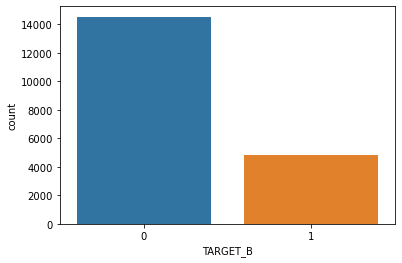

In [12]:
# let us see how they donate
sns.countplot(x ='TARGET_B', data = donor_data) 
  
# Show the plot 
plt.show() 

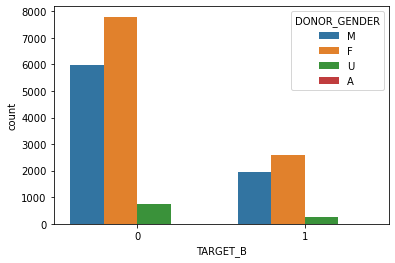

In [13]:
# now let take a look at donation distribution as regard gender
sns.countplot(x ='TARGET_B',hue = "DONOR_GENDER", data = donor_data) 
# Show the plot 
plt.show() 

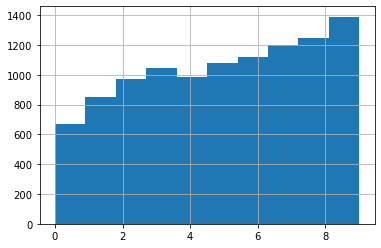

In [14]:
#let us look at istribution of wealth rating 

donor_data.WEALTH_RATING .hist()

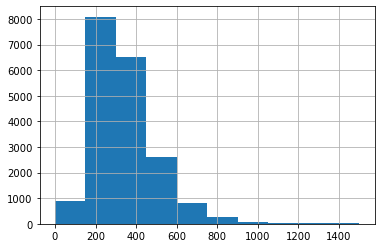

In [15]:
donor_data.MEDIAN_HOUSEHOLD_INCOME.hist() 

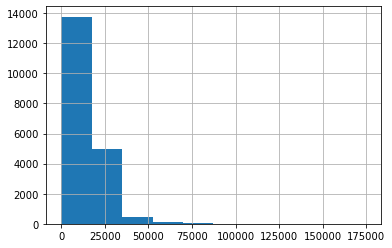

In [16]:
donor_data.PER_CAPITA_INCOME.hist()

In [17]:
# as it can be seen from above per capital income concentrated at 0 - 25000

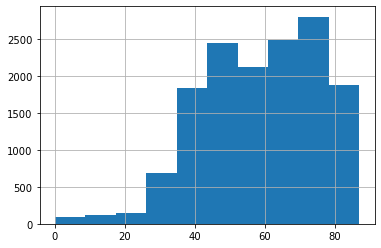

In [18]:
# now let look at the distribution of Donor_Age
donor_data.DONOR_AGE.hist()

In [19]:
# we can see here that donor skewed to the right ie majority of the donor falls between 40 and 80 yrs

### Data Wrangling

####  checking for missing values

In [20]:
#finding the number of missing values in each column
donor_data.isnull().sum() # isnull() or isna()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [21]:
# here we have 5 colunnn with missing values DONOR_AGE ,INCOME_GROUP, WEALTH_RATING,MONTHS_SINCE_LAST_PROM_RESP and TARGET_D                   

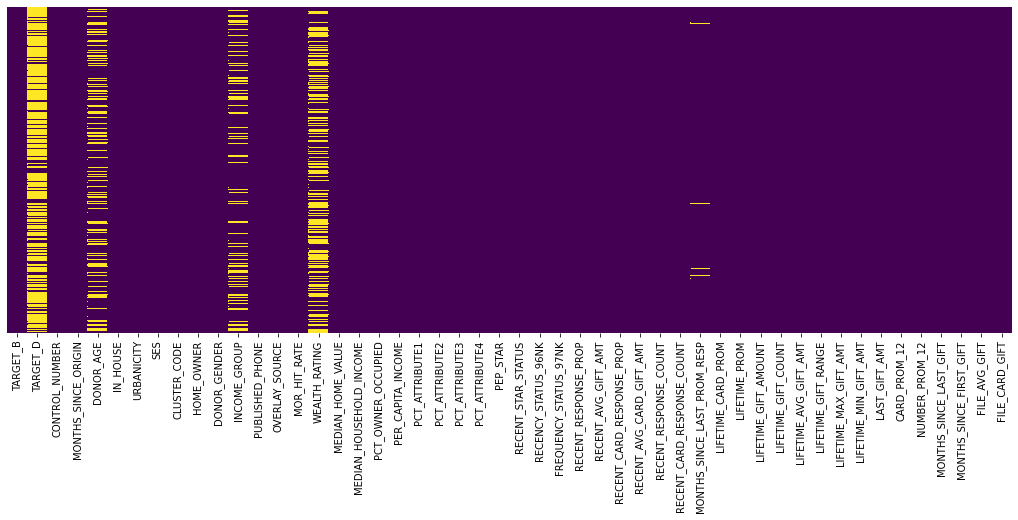

In [22]:
# alternatively Use heatmaps from seaborn to get a graphical representation of the data and missing null values
plt.figure(figsize=(18,6))
sns.heatmap(donor_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
 #number of unique values (frequency) in each column
#donor_data.nunique()

In [24]:
# now let explore the columns with missing values to find approprite summary statistics to fill the missing values
donor_data.DONOR_AGE.value_counts()

67.0    411
49.0    404
73.0    395
77.0    381
75.0    380
       ... 
18.0      2
20.0      1
12.0      1
4.0       1
14.0      1
Name: DONOR_AGE, Length: 80, dtype: int64

In [25]:
# here we are going to use the median age
donor_data["DONOR_AGE"].median()

60.0

In [26]:
# now let replace the missing values in "DONOR_AGE" with median value
donor_data.loc[:,"DONOR_AGE"].replace(np.nan,60,inplace=True)

In [27]:
# let us check if it had been implemented
donor_data.isnull().sum() 

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [28]:
# let us look at our data again to see the kind of values in income group
donor_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,60.0,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [29]:
income_group = donor_data["INCOME_GROUP"]
print(income_group)

0        2.0
1        7.0
2        5.0
3        6.0
4        2.0
        ... 
19367    4.0
19368    5.0
19369    1.0
19370    6.0
19371    5.0
Name: INCOME_GROUP, Length: 19372, dtype: float64


In [30]:
# so I want to use the same method use in Donor_Age group to find the missing values
donor_data["INCOME_GROUP"].median()

4.0

In [31]:
# now let input this for missing values in Income_Group column
donor_data.loc[:,"INCOME_GROUP"].replace(np.nan,4,inplace=True)

In [32]:
# again let us check if it has been implemented
donor_data.isnull().sum() 

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

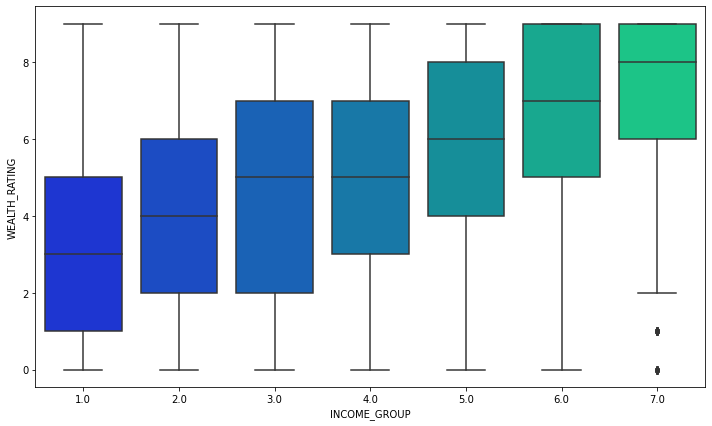

In [33]:
# now I want to fill in missing values in wealth rating, I am exploring the wealth rating of different donors based on their income group
# using seaborns's boxplot

plt.figure(figsize=(12, 7))
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=donor_data,palette='winter')

In [34]:
# from above we can see that there is a relationship between wealth_rating and income_group
# we are going to use the value of income group to input for wealth rating missing values
#since there is a linear relationship between them
# we are going to use the middle value of the boxplot ie when income_group is 1 whealth_rating =3,when 2,wealth_rating=4
# and so on

In [35]:
# now let create a function to input the missing values into wealth_rating based on income_group
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 4
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 6
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [36]:
donor_data['WEALTH_RATING'] = donor_data[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)

In [37]:
# now let us check if it has been implemented
donor_data.isnull().sum() 

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                      0
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [38]:
# i want to check the type of data in this column
#check= donor_data["MONTHS_SINCE_LAST_PROM_RESP"]

In [39]:
#print(check)

In [40]:
#donor_data.MONTHS_SINCE_LAST_PROM_RESP.value_counts()

In [41]:
donor_data["MONTHS_SINCE_LAST_PROM_RESP"].median()

18.0

In [42]:
# now let replace the missing values in "MONTHS_SINCE_LAST_PROM_RESP" with median value
donor_data.loc[:,"MONTHS_SINCE_LAST_PROM_RESP"].replace(np.nan,18,inplace=True)

In [43]:
# now let us check if it has been implemented
donor_data.isnull().sum() 

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                          0
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                       0
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                      0
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [44]:
# Also some values in CLUSTER_CODE have ' .' as values. I am changing this to 0 to avoid errors when the model is trained

In [45]:
#donor_data.loc[:,"CLUSTER_CODE"].replace(".",0,inplace=True)
donor_data['CLUSTER_CODE'].replace(' .',0,inplace = True)

In [46]:
#let us check to see if it has been implemented
donor_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,0,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,60.0,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


### Encoding

In [47]:
# i need to display all the columns to have a grasp of the type data in them
pd.set_option('display.max_columns', None)
donor_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,0,H,M,2.0,0,P,0,4.0,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,60.0,0,U,2,04,H,F,6.0,1,B,0,4.0,1688,153,3,16342,0,25,32,42,1,0,A,3,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,F,2.0,1,B,8,5.0,514,328,90,12107,0,33,36,37,0,0,A,1,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


### I notice that the URBANICITY, HOME_OWNER, DONOR_GENDER, OVERLAY_SOURCE, RECENCY_STATUS and ses column are categorical.That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.



In [48]:
#now let covert the categorical variable in urbancity to dummies variable
urban_city= pd.get_dummies(donor_data["URBANICITY"],drop_first=True)

In [49]:
urban_city.head()

,C,R,S,T,U
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,1,0,0,0


In [50]:
# since we have about six column with categorical variables,I am going to select all of them at once and transform them.
# and there would be no need to concatenate them because the data frame has been expanded,the new dataframe is now new_ donor_data 
new_donor_data =pd.get_dummies(donor_data, columns=['URBANICITY','SES','HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK', "FREQUENCY_STATUS_97NK"], drop_first = True)
new_donor_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,URBANICITY_C,URBANICITY_R,URBANICITY_S,URBANICITY_T,URBANICITY_U,SES_2,SES_3,SES_4,SES_?,HOME_OWNER_U,DONOR_GENDER_F,DONOR_GENDER_M,DONOR_GENDER_U,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4
0,0,NaN,5,101,87.0,0,0,2.0,0,0,4.0,554,294,76,11855,0,0,0,0,1,0,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,10.0,12,137,79.0,0,45,7.0,0,0,3.0,334,212,72,10385,0,41,21,31,1,1,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0,NaN,37,113,75.0,0,11,5.0,0,0,9.0,2388,405,63,30855,0,25,26,57,1,1,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,0,NaN,38,92,60.0,0,04,6.0,1,0,4.0,1688,153,3,16342,0,25,32,42,1,0,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,NaN,41,101,74.0,0,49,2.0,1,8,5.0,514,328,90,12107,0,33,36,37,0,0,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#now let us check the dimension of our expanded dataframe
new_donor_data.shape

(19372, 67)

## Feature Selection

In [52]:
# now let drop the column with "TARGET_D" beccause most of the data has NaN and it is of no importance
new_donor_data.drop(['TARGET_D'],axis=1,inplace = True)
new_donor_data.head() # check to see if it has been implemented

,TARGET_B,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT,URBANICITY_C,URBANICITY_R,URBANICITY_S,URBANICITY_T,URBANICITY_U,SES_2,SES_3,SES_4,SES_?,HOME_OWNER_U,DONOR_GENDER_F,DONOR_GENDER_M,DONOR_GENDER_U,OVERLAY_SOURCE_M,OVERLAY_SOURCE_N,OVERLAY_SOURCE_P,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4
0,0,5,101,87.0,0,0,2.0,0,0,4.0,554,294,76,11855,0,0,0,0,1,0,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,12,137,79.0,0,45,7.0,0,0,3.0,334,212,72,10385,0,41,21,31,1,1,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0,37,113,75.0,0,11,5.0,0,0,9.0,2388,405,63,30855,0,25,26,57,1,1,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,0,38,92,60.0,0,04,6.0,1,0,4.0,1688,153,3,16342,0,25,32,42,1,0,0.474,13.44,0.400,13.50,9,4,11.0,31,96,435.0,37,11.76,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,41,101,74.0,0,49,2.0,1,8,5.0,514,328,90,12107,0,33,36,37,0,0,0.100,17.50,0.111,10.00,2,1,18.0,30,83,106.0,12,8.83,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# now we decide (form a hypthesis) which of the above features (predictors) best describe
# who is going to donate for the charitable organisation
#X = new_donor_data[["CONTROL_NUMBER","PER_CAPITA_INCOME","RECENCY_STATUS_96NK_L","SES_4", "RECENCY_STATUS_96NK_E","SES_?","MEDIAN_HOME_VALUE","DONOR_GENDER_U" , "RECENCY_STATUS_96NK_N"  ,"IN_HOUSE"]]
#y = new_donor_data["TARGET_B"]

In [54]:
#X =new_donor_data.iloc[:,1:50]  #independent columns
#y = new_donor_data.iloc[:,0]    #target column 

In [55]:
# best with o.2 split
X=new_donor_data[["CONTROL_NUMBER",   "PER_CAPITA_INCOME", "MEDIAN_HOME_VALUE",  "MEDIAN_HOUSEHOLD_INCOME", "MONTHS_SINCE_ORIGIN", "RECENT_AVG_GIFT_AMT", "RECENT_RESPONSE_COUNT","RECENT_CARD_RESPONSE_COUNT","LIFETIME_GIFT_RANGE" ]]
y=new_donor_data["TARGET_B"]


In [56]:
# now let eplore the columns in our predictor
X.shape

(19372, 9)

In [57]:
X.columns

Index(['CONTROL_NUMBER', 'PER_CAPITA_INCOME', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'MONTHS_SINCE_ORIGIN', 'RECENT_AVG_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'LIFETIME_GIFT_RANGE'],
      dtype='object')

In [58]:
#X=new_donor_data[["LIFETIME_GIFT_AMOUNT" , "MONTHS_SINCE_FIRST_GIFT", "LIFETIME_GIFT_COUNT", "LIFETIME_PROM", "FILE_CARD_GIFT" ,"LAST_GIFT_AMT",    "LIFETIME_MIN_GIFT_AMT",   "LIFETIME_AVG_GIFT_AMT"  ,  "FILE_AVG_GIFT",   "LIFETIME_MAX_GIFT_AMT"  ]]
#y=new_donor_data["TARGET_B"]

In [59]:
# try this also good
#X=new_donor_data[["CONTROL_NUMBER",   "PER_CAPITA_INCOME", "MEDIAN_HOME_VALUE",  "MEDIAN_HOUSEHOLD_INCOME", "MONTHS_SINCE_ORIGIN", "RECENT_AVG_GIFT_AMT", "RECENT_RESPONSE_COUNT","RECENT_CARD_RESPONSE_COUNT","LIFETIME_GIFT_RANGE","LIFETIME_GIFT_AMOUNT" , "MONTHS_SINCE_FIRST_GIFT", "LIFETIME_GIFT_COUNT", "LIFETIME_PROM", "FILE_CARD_GIFT" ,"LAST_GIFT_AMT",    "LIFETIME_MIN_GIFT_AMT",   "LIFETIME_AVG_GIFT_AMT"  ,  "FILE_AVG_GIFT",   "LIFETIME_MAX_GIFT_AMT"   ]]
#y=new_donor_data["TARGET_B"]


In [60]:
# also get an idea of the distribution of TARGET_B-imply column for past donations 0 means not donate and 1 rep  has donate
# let us see how they donate

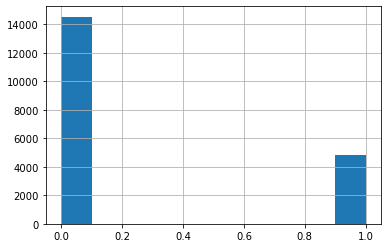

In [61]:
y.hist()

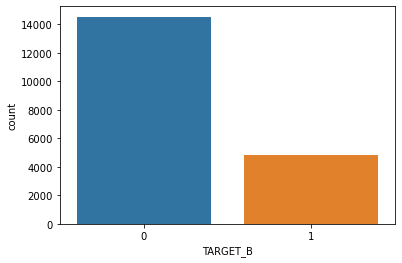

In [62]:
sns.countplot(x ='TARGET_B', data = new_donor_data) 
  
# Show the plot 
plt.show() 

In [63]:
#split the data into training/test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)

In [64]:
# extract the dimensions of our train/test features and target variables
X_train.shape

(9686, 9)

In [65]:
X_test.shape

(9686, 9)

In [66]:
y_train.shape

(9686,)

In [67]:
y_test.shape

(9686,)

### Fit model - (Logistic Regression)

In [68]:
estimator = LogisticRegression(random_state=RANDOM_STATE) # STEP 1: setting up our ML algo
estimator.fit(X_train,y_train) # STEP 2: fit the model on the TRAINING set

y_true = y_test # STEP 3 (optional): variable name convention

y_pred = estimator.predict(X_test) # STEP 4: predict the target (who is creditworthy) using the TEST set
y_score = estimator.predict_proba(X_test)[:,0] # STEP 5 (optional): extract classification
# probabilities so that we can create a ROC curve later

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance Metrics

In [69]:
accuracy_score(y_true,y_pred) # accuracy is the most basic ML performance measure


0.7494321701424737

In [70]:
confusion_matrix(y_true, y_pred)

array([[7255,    6],
       [2421,    4]], dtype=int64)

In [71]:

precision_score(y_true, y_pred)

0.4

In [72]:
recall_score(y_true, y_pred)

0.0016494845360824743

In [73]:
# let dive deep further to see if we would get better performance

param_grid = dict(C=[0.00001,0.0001,0.001,0.01,0.1,1,10],penalty=['l1','l2'])
regr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
cv = GridSearchCV(estimator=regr, param_grid=param_grid, scoring='average_precision')
cv.fit(X_train, y_train)
estimator = cv.best_estimator_

y_true = y_test  # 3
y_pred = estimator.predict(X_test)  # 4
y_score = estimator.predict_proba(X_test)[:, 0]  # 5

In [74]:
# let chech the performance if the model has improved

In [75]:
accuracy=accuracy_score(y_true,y_pred) # accuracy is the most basic ML performance measure


In [76]:
precision_score(y_true, y_pred)

0.4305555555555556

In [77]:
confusion_matrix(y_true, y_pred)

array([[7220,   41],
       [2394,   31]], dtype=int64)

In [78]:
recall_score(y_true, y_pred)

0.012783505154639175

In [79]:

# Here we use hyperparameter tuning and a scaling pipeline to improve results


scaler = StandardScaler() # scaling function

#same three lines below for grid search acroos hyperparameters C and penalty as in Method 3
param_grid = dict(C=[0.00001,0.0001,0.001,0.01,0.1,1,10],penalty=['l1','l2'])
regr = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
cv = GridSearchCV(estimator=regr, param_grid=param_grid, scoring='average_precision')

pipeline = make_pipeline(scaler, cv) # here we SCALE the data so that all features are in the same "ballpark"

pipeline.fit(X_train, y_train) # fit the model to the SCALED data

y_true = y_test
y_pred = pipeline.predict(X_test)
y_score = pipeline.predict_proba(X_test)[:, 1]

In [80]:
#  again,let chech the performance if the model has improved

In [81]:
accuracy_score(y_true,y_pred) # accuracy is the most basic ML performance measure

0.7467478835432583

In [82]:
precision_score(y_true, y_pred)

0.3870967741935484

In [83]:
confusion_matrix(y_true, y_pred)

array([[7185,   76],
       [2377,   48]], dtype=int64)

In [84]:
recall_score(y_true, y_pred)

0.01979381443298969

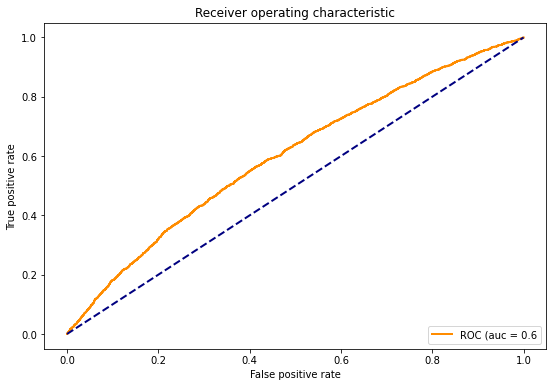

In [85]:
# plot ROC Curve 
plot_roc_curve(y_true, y_score)

In [86]:
#Now we proceed to read the prospectie donor file, and use the model created above to get the desired outcome
prospective_donor = pd.read_csv('Prospective Donor_ML with Python.csv')

In [87]:
prospective_donor.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,0,N,0,NaN,655,219,77,12671,0,46,24,53,0,0,A,1,0.071,21.00,0.000,0.00,1,0,26.0,11,25,103.0,7,14.71,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,1,N,0,1.0,475,227,70,10221,0,30,33,29,1,1,S,2,0.350,10.00,0.500,10.00,7,5,22.0,44,110,186.0,31,6.00,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,1,B,11,NaN,1117,544,87,18212,1,27,70,21,0,0,F,1,0.077,20.00,0.200,20.00,1,1,20.0,13,39,76.0,9,8.44,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,1,B,1,7.0,2257,485,84,17885,0,43,28,41,1,10,A,1,0.333,8.83,0.444,8.75,6,4,19.0,42,114,247.0,38,6.50,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,0,B,0,NaN,789,413,97,14123,0,31,16,7,0,0,A,3,0.278,5.40,0.222,6.00,5,2,20.0,15,43,70.0,12,5.83,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [88]:
prospective_donor.shape

(2148, 48)

In [115]:
prospective_donor["DONOR_AGE"].median()

59.0

In [116]:
prospective_donor.loc[:,"DONOR_AGE"].replace(np.nan,59,inplace=True)

In [117]:
prediction = pd.Series(pipeline.predict(X))
survivors = prospective_donor[['CONTROL_NUMBER','DONOR_AGE','DONOR_GENDER','PER_CAPITA_INCOME']]
survivors['prediction']= prediction
predicted_donor=(survivors.loc[survivors['prediction'] ==1])
print(predicted_donor)

      CONTROL_NUMBER  DONOR_AGE DONOR_GENDER  PER_CAPITA_INCOME  prediction
12               804        7.0            F              17179           1
78              7169       59.0            M              12040           1
79              7174       67.0            F              11074           1
81              7346       59.0            F               9361           1
87              7846       59.0            M              12951           1
113            10248       59.0            M               9578           1
123            11254       62.0            F              15138           1
126            11561       66.0            F              26348           1
154            13970       57.0            F              20444           1
174            15830       63.0            F              18856           1
224            20031       31.0            F              13810           1
247            22188       48.0            F              11352           1
258         

<ipython-input-117-f949ce178fad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivors['prediction']= prediction


In [93]:
predicted_donor.shape

(31, 2)